In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
import qiskit.providers.fake_provider
from qiskit_aer import AerSimulator, Aer
import os, sys
current_dir = os.getcwd()
sys.path.append(os.path.dirname(os.path.abspath(current_dir)))
from Backend.fake_backend import FakeBackend
from Backend.backend import Backend
from Result.result import ResultData


import pandas as pd
from fractions import Fraction

from itertools import permutations
from SaveData.save_data_to_file import CSVWriter

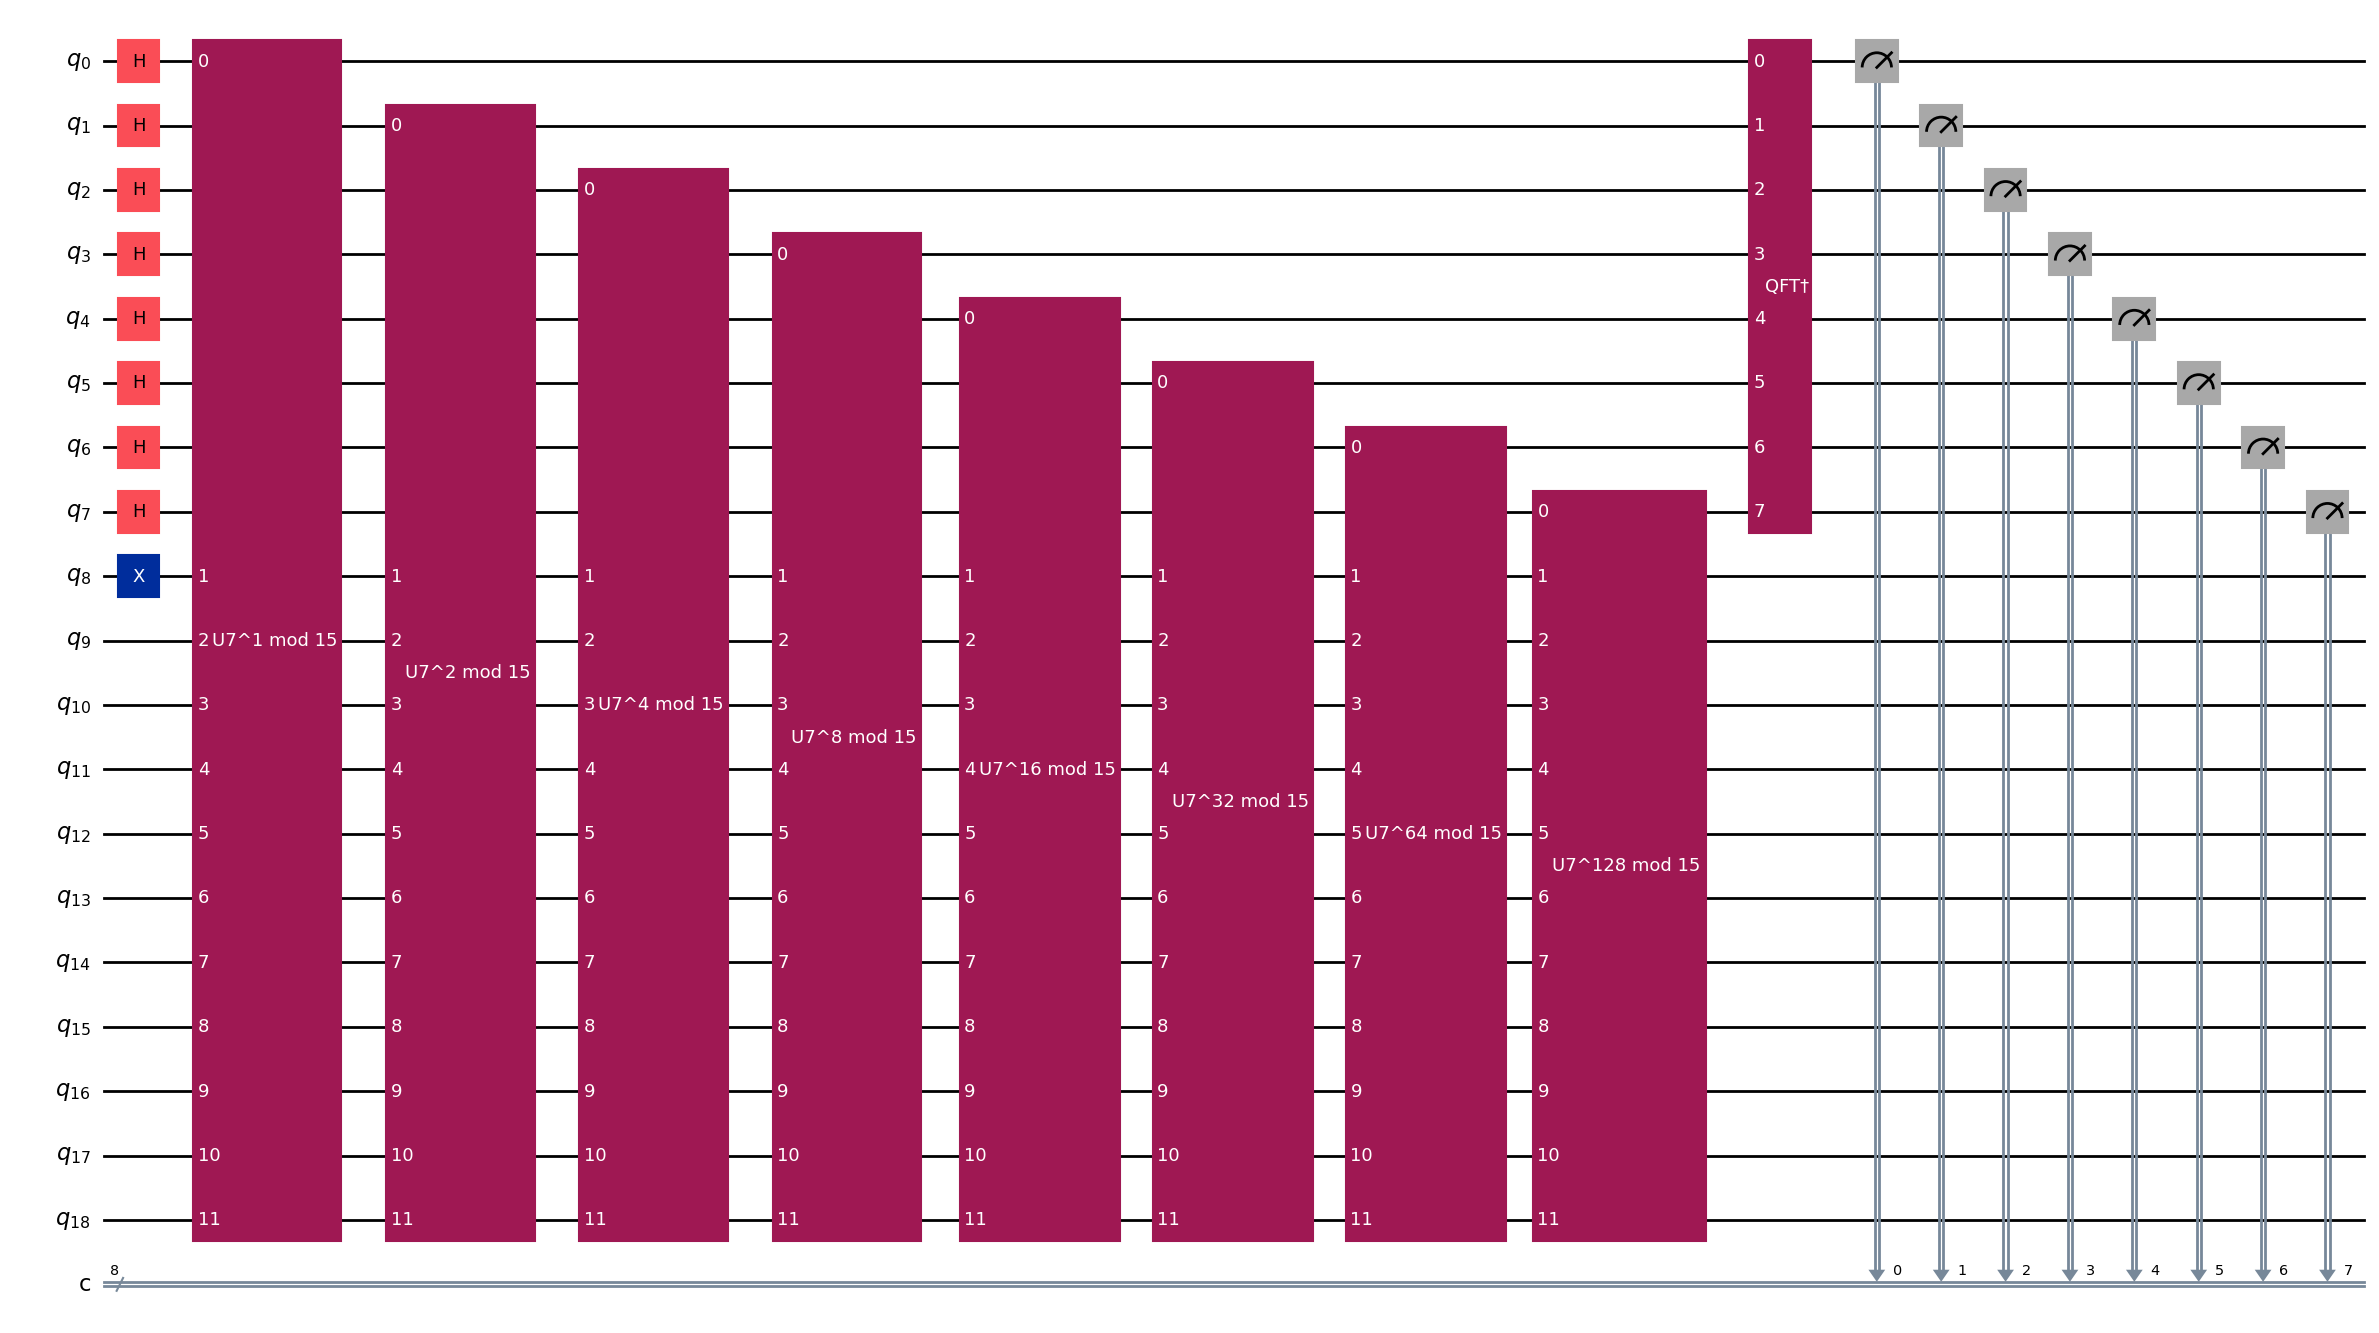

In [5]:
from shor_algo_adder_method import shor_circiut
import bit_functions

N = 15
a = 7
N_COUNT = 2*bit_functions.bit_length(N)

qc = shor_circiut(N, a)

qc.draw('mpl', fold = -1)

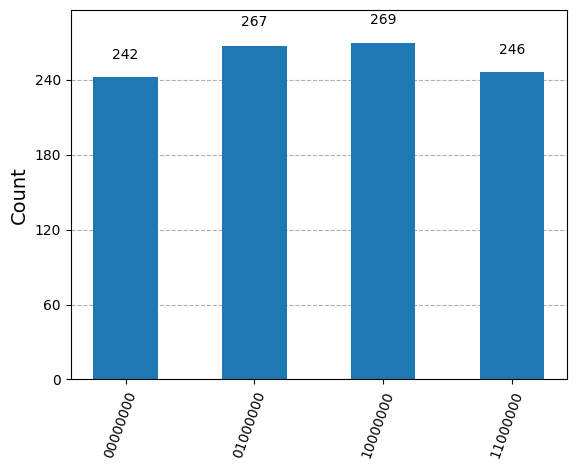

In [6]:
#run on aer simulator
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
# counts = execute(t_qc, aer_sim).result().get_counts()
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [7]:
#run on fake backend
fake_auckland_backend = FakeBackend.get_ibm_fake_backend('fake_auckland')
fake_backend_name = 'fake_auckland'
fake_backend = FakeBackend(fake_backend_name)

In [14]:
layoutlist = [list(range(19))]

In [9]:
transpile_list = []
for opt_lvl in [0, 3]: #[0, 3]:
    for layout in  layoutlist:
        transpile_list.append(
            fake_backend.transpile_save_param(qc=qc, optimization_level=opt_lvl, initial_layout=layout, seed_transpiler=None, 
                                                 input_a = a, input_N = N, input_qubit_num = N_COUNT))


In [10]:
qc_resultData = []
for qc_tr in transpile_list:
    qc_res  = qc_tr.backend.run(qc_tr.transpiled_qc, shots=1024, seed_simulator=None)
    result = ResultData(qc_res)  
    qc_resultData.append(result)

In [15]:
for opt_lvl in [0, 3]: #[0, 3]:
    for layout in  layoutlist:
        transpile_list.append(
            fake_backend.transpile_save_param(qc=qc, optimization_level=opt_lvl, initial_layout=layout, seed_transpiler=None, 
                                                 input_a = a, input_N = N, input_qubit_num = N_COUNT))

for qc_tr in transpile_list:
    qc_res  = qc_tr.backend.run(qc_tr.transpiled_qc, shots=1024, seed_simulator=None)
    result = ResultData(qc_res)  
    qc_resultData.append(result)       

In [16]:
excel_name = f"shor_{N}_with_{a}.csv"

save = CSVWriter(file_name=excel_name)

data = []
for qc_transpile, res_data in zip(transpile_list, qc_resultData):
    data.append([qc_transpile, res_data])  

save.save_data(data)

Data saved to ..\logs\shor_15_with_7_2024_09_03_11_35_22.csv
